In [17]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()




Using the Ticker function to extract the data to create a ticker object. The stock I'm choosing for now is Tesla, with its ticker symbol TSLA.

In [4]:
tesla = yf.Ticker("TSLA")

tesla_shares = tesla.history(period="max")

tesla_shares.reset_index(inplace=True)
tesla_shares.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2956,2022-03-25,1008.000000,1021.799988,997.320007,1010.640015,20642900,0,0.0
2957,2022-03-28,1065.099976,1097.880005,1053.599976,1091.839966,34168700,0,0.0
2958,2022-03-29,1107.989990,1114.770020,1073.109985,1099.569946,24538300,0,0.0
2959,2022-03-30,1091.170044,1113.949951,1084.000000,1093.989990,19955000,0,0.0
2960,2022-03-31,1094.569946,1103.139893,1076.640991,1077.599976,16330919,0,0.0


In [5]:
data = requests.get("https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue").text

In [6]:
soup = BeautifulSoup(data, "html5lib")
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    rev = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":rev}, ignore_index = True)

C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\2575334642.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":rev}, ignore_index = True)
C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\2575334642.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":rev}, ignore_index = True)
C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\2575334642.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":rev}, ignore_index = True)
C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\2575334642.py:7: FutureWarning: The frame.append method 

In [7]:
tesla_revenue.head()

,Date,Revenue
0,2021-12-31,"$17,719"
1,2021-09-30,"$13,757"
2,2021-06-30,"$11,958"
3,2021-03-31,"$10,389"
4,2020-12-31,"$10,744"


In [8]:
#Removing the $ and , from the Revenue columns, and any other miscellanious items, like null values 
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.head()

C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\485504536.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")


,Date,Revenue
0,2021-12-31,17719
1,2021-09-30,13757
2,2021-06-30,11958
3,2021-03-31,10389
4,2020-12-31,10744


Extracting Stock Data using yfinance

In [9]:
gamestop = yf.Ticker("GME")
gm_shares = gamestop.history(period="max")
gm_shares.reset_index(inplace=True)
gm_shares.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850829,6.864295,6.682504,6.733002,2755400,0.0,0.0
2,2002-02-15,6.733002,6.749834,6.632007,6.699337,2097400,0.0,0.0
3,2002-02-19,6.665670,6.665670,6.312188,6.430016,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


In [11]:
html_data = requests.get("https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue").text
soup = BeautifulSoup(html_data, "html5lib")
gm_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    rev = col[1].text
    gm_revenue = gm_revenue.append({"Date":date, "Revenue":rev}, ignore_index = True)


C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\2010812889.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gm_revenue = gm_revenue.append({"Date":date, "Revenue":rev}, ignore_index = True)
C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\2010812889.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gm_revenue = gm_revenue.append({"Date":date, "Revenue":rev}, ignore_index = True)
C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\2010812889.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gm_revenue = gm_revenue.append({"Date":date, "Revenue":rev}, ignore_index = True)
C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\2010812889.py:8: FutureWarning: The frame.append method is deprecated and 

In [12]:
gm_revenue["Revenue"] = gm_revenue['Revenue'].str.replace(',|\$',"")
gm_revenue.dropna(inplace=True)
gm_revenue = gm_revenue[gm_revenue['Revenue'] != ""]

C:\Users\Rizky Gamal\AppData\Local\Temp\ipykernel_19612\2605033361.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  gm_revenue["Revenue"] = gm_revenue['Revenue'].str.replace(',|\$',"")


In [21]:
gm_revenue.tail()

,Date,Revenue
47,2010-01-31,3524
48,2009-10-31,1835
49,2009-07-31,1739
50,2009-04-30,1981
51,2009-01-31,3492


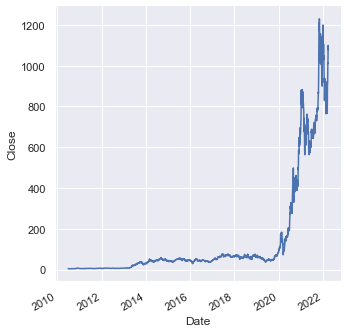

In [23]:
g = sns.relplot(x="Date", y="Close", kind="line", data=tesla_shares)
g.figure.autofmt_xdate()